In [1]:
import sys
import pandas as pd
import matplotlib
import numpy as np
import scipy as sp
import IPython
import sklearn
%matplotlib inline
from preamble import *

# Sample Datasets

In [2]:
# generate forge dataset
X, y = mglearn.datasets.make_forge()

# generate breast cancer dataset
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()

# generate boston housing dataset
from sklearn.datasets import load_boston
boston = load_boston()

# Kernelized Support Vector Machines
Kernelized support vector machines (often just referred to as SVMs) are an extension that allows for more complex models that are not defined simply by hyperplanes in the input space. While there are support vector machines for classification and regression, we will restrict ourselves to the classification case, as implemented in SVC. Similar concepts apply to support vector regression, as implemented in SVR.

## Linear models and nonlinear features
Linear models can be quite limiting in low-dimensional spaces, as lines and hyperplanes have limited flexibility. One way to make a linear model more flexible is by adding more features—for example, by adding interactions or polynomials of the input features.

Let’s look at this synthetic dataset:

Text(0,0.5,'Feature 1')

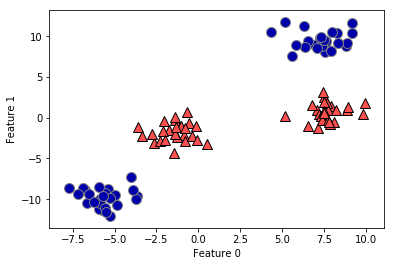

In [4]:
from sklearn.datasets import make_blobs

X, y = make_blobs(centers=4, random_state=8)
y = y % 2

mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

A linear model for classification can only separate points using a line, and will not be able to do a very good job on this dataset:

Text(0,0.5,'Feature 1')

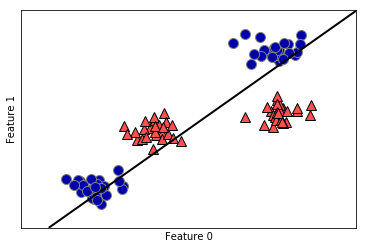

In [5]:
from sklearn.svm import LinearSVC
linear_svm = LinearSVC().fit(X, y)

mglearn.plots.plot_2d_separator(linear_svm, X)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

Now let’s expand the set of input features, say by also adding $feature1 ** 2$, the square of the second feature, as a new feature. Instead of representing each data point as a two-dimensional point, (feature0, feature1), we now represent it as a three-dimensional point, $(feature0, feature1, feature1 ** 2)$. This new representation
is illustrated below in a three-dimensional scatter plot:

Text(0.5,0,'feature1 ** 2')

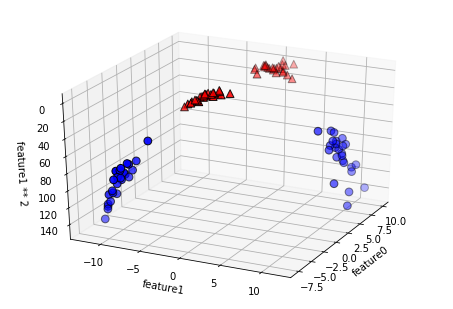

In [6]:
# add the squared first feature
X_new = np.hstack([X, X[:, 1:] ** 2])


from mpl_toolkits.mplot3d import Axes3D, axes3d
figure = plt.figure()
# visualize in 3D
ax = Axes3D(figure, elev=-152, azim=-26)
# plot first all the points with y==0, then all with y == 1
mask = y == 0
ax.scatter(X_new[mask, 0], X_new[mask, 1], X_new[mask, 2], c='b',
           cmap=mglearn.cm2, s=60, edgecolor='k')
ax.scatter(X_new[~mask, 0], X_new[~mask, 1], X_new[~mask, 2], c='r', marker='^',
           cmap=mglearn.cm2, s=60, edgecolor='k')
ax.set_xlabel("feature0")
ax.set_ylabel("feature1")
ax.set_zlabel("feature1 ** 2")